In [ ]:
from google.colab import drive   # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

drive.mount('/content/gdrive/')  # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
%tensorflow_version 1.x

import tensorflow as tf
import os
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


working_dir = 'tensorflow_2.x_working_dir'

colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

original_dir = os.getcwd()

try:

  os.chdir(colab_default_dir)

  if not os.path.exists(working_dir):
    os.mkdir(working_dir)

  os.chdir(working_dir)
  print("current dir = ", os.getcwd())

except Exception as err:
  
  os.chdir(original_dir)
  print(str(err))

TensorFlow 1.x selected.
current dir =  /content/gdrive/My Drive/Colab Notebooks/tensorflow_2.x_working_dir


In [ ]:
try:
  
  train_df = pd.read_csv('./titanic_train.csv')
  test_df = pd.read_csv('./titanic_test.csv')
  gender_df = pd.read_csv('./titanic_gender_submission.csv')

  print("train_df.shape = ", train_df.shape, ", test_df.shape = ", test_df.shape, ", gender_df.shape = ", gender_df.shape)

except Exception as err:
  
  print(str(err))

train_df.shape =  (891, 12) , test_df.shape =  (418, 11) , gender_df.shape =  (418, 2)


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
test_df['Survived'] = gender_df['Survived']

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
test_df = test_df[ ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'] ]

test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print("[train_df.isnull().sum()]\n", train_df.isnull().sum())
print("\n\n[test_df.isnull().sum()]\n", test_df.isnull().sum())

[train_df.isnull().sum()]
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


[test_df.isnull().sum()]
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
train_df = train_df[ ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] ]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
test_df = test_df[ ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] ]

test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [ ]:
print("[train_df.isnull().sum()]\n", train_df.isnull().sum())
print("\n\n[test_df.isnull().sum()]\n", test_df.isnull().sum())

[train_df.isnull().sum()]
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


[test_df.isnull().sum()]
 Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [ ]:
train_df["Sex"] = train_df["Sex"].apply(lambda x: 0 if x == "male" else 1)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [ ]:
test_df["Sex"] = test_df["Sex"].apply(lambda x: 0 if x == "male" else 1)

test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0


In [ ]:
print("train_df Age mean = ", train_df['Age'].mean())
print("train_df Age median = ", train_df['Age'].median())

print("\ntest_df Age mean = ", test_df['Age'].mean())
print("test_df Age median = ", test_df['Age'].median())
print("test_df Fare mean = ", train_df['Fare'].mean())
print("test_df Fare median = ", train_df['Fare'].median())

train_df Age mean =  29.69911764705882
train_df Age median =  28.0
train_df Embarked mean =  0.3658810325476992
train_df Embarked median =  0.0

test_df Age mean =  30.272590361445783
test_df Age median =  27.0
test_df Fare mean =  32.2042079685746
test_df Fare median =  14.4542


In [ ]:
train_df['Age'].fillna(float(train_df['Age'].mean()), inplace=True)

print("[train_df.isnull().sum()]\n", train_df.isnull().sum(), "\n")

train_df

[train_df.isnull().sum()]
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64 



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [ ]:
test_df['Age'].fillna(float(test_df['Age'].mean()), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

print("[test_df.isnull().sum()]\n", test_df.isnull().sum(), "\n")

test_df

[test_df.isnull().sum()]
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64 



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.50000,0,0,7.8292,2
1,1,3,1,47.00000,1,0,7.0000,0
2,0,2,0,62.00000,0,0,9.6875,2
3,0,3,0,27.00000,0,0,8.6625,0
4,1,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,8.0500,0
414,1,1,1,39.00000,0,0,108.9000,1
415,0,3,0,38.50000,0,0,7.2500,0
416,0,3,0,30.27259,0,0,8.0500,0


In [ ]:
class DataGeneration:
    
    # target_position = 0 (첫번째열이 정답데이터), target_position=-1 (마지막열이 정답데이터)
    def __init__(self, file, seperation_rate, target_position=-1):
        
        self.file = file
        
        self.seperation_rate = seperation_rate
        
        if (target_position == -1  or  target_position == 0):      
            self.target_position = target_position
        
        else:
            err_str = 'target_position must be -1 or 0'            
            raise Exception(err_str)    
            
    
    # print data target distribution 
    # str_of_kind : 'original data' or  'training data'  or  'test data'
    def __display_target_distribution(self, data, str_of_kind='original data'):
        
        print('=======================================================================================================')
        
        target_data = data[ :, self.target_position ]
        
        # numpy.unique() 사용하여 loaded data target 분포 확인
        unique, counts = np.unique(target_data, return_counts=True)

        unique_target = []
    
        for index in range(len(unique)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique[index], ', count = ', counts[index])
        
            unique_target.append(unique[index])

        for index in range(len(unique_target)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique_target[index], ', ratio = ', np.round(100 * counts[index] / (target_data.shape[0]), 2), ' %')
    
        print('=======================================================================================================')
        
        
    # numpy.random.shuffle()  이용하여 training_data / test_data 생성
    def generate(self):
    
        # 데이터 불러오기, 파일이 없는 경우 exception 발생

        loaded_data = self.file

        print("[DataGeneration]  loaded_data.shape = ", loaded_data.shape)
            
        # print the target distribution of original data 
        
        self.__display_target_distribution(loaded_data, 'original data')
        
        
        # 분리비율에 맞게 테스트데이터로 분리
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)

        # numpy.random.shuffle 을 이용하여 랜덤하게 데이터 섞기
        np.random.shuffle(loaded_data)
        
        # test_data 는 0 : test_data_num
        
        
        test_data = loaded_data[ 0:test_data_num ]

        # training_data 는 test_data_num 부터 끝까지 
        training_data = loaded_data[ test_data_num: ]

        # display target distribution of generated data 
        
        self.__display_target_distribution(training_data, 'training data')
        
        self.__display_target_distribution(test_data, 'test data')
        
        return training_data, test_data

In [ ]:
# DataGeneration class 이용하여 training data , validation data 생성
seperation_rate = 0.1  # training data 10 % 비율로 validation data 생성
target_position = 0   # 정답은 첫번째 열

train_data = np.array(test_df)

data_obj = DataGeneration(np.array(train_data, seperation_rate, target_position)

(training_data, validation_data) = data_obj.generate()
    
print("training_data.shape = ", training_data.shape)
print("validation_data.shape = ", validation_data.shape)

test_data = np.array(test_df)

print("test_data.shape = ", test_data.shape)

[DataGeneration]  loaded_data.shape =  (891, 8)
[DataGeneration] unique number of original data =  0.0 , count =  549
[DataGeneration] unique number of original data =  1.0 , count =  342
[DataGeneration] unique number of original data =  0.0 , ratio =  61.62  %
[DataGeneration] unique number of original data =  1.0 , ratio =  38.38  %
[DataGeneration] unique number of training data =  0.0 , count =  495
[DataGeneration] unique number of training data =  1.0 , count =  307
[DataGeneration] unique number of training data =  0.0 , ratio =  61.72  %
[DataGeneration] unique number of training data =  1.0 , ratio =  38.28  %
[DataGeneration] unique number of test data =  0.0 , count =  54
[DataGeneration] unique number of test data =  1.0 , count =  35
[DataGeneration] unique number of test data =  0.0 , ratio =  60.67  %
[DataGeneration] unique number of test data =  1.0 , ratio =  39.33  %
training_data.shape =  (802, 8)
validation_data.shape =  (89, 8)
test_data.shape =  (418, 8)


In [ ]:
training_xdata = training_data[ :  , 1:]
training_tdata = training_data[ :  , [0]]

validation_xdata = validation_data[ :  , 1:]
validation_tdata = validation_data[ :  , [0]]

test_xdata = test_data[ :  , 1:]
test_tdata = test_data[ :  , [0]]

print("training_xdata = ", training_xdata.shape, ", training_tdata = ", training_tdata.shape)
print("validation_xdata = ", validation_xdata.shape, ", validation_tdata = ", validation_tdata.shape)
print("test_xdata = ", test_xdata.shape, ", test_tdata = ", test_tdata.shape)

training_xdata =  (802, 7) , training_tdata =  (802, 1)
validation_xdata =  (89, 7) , validation_tdata =  (89, 1)
test_xdata =  (418, 7) , test_tdata =  (418, 1)


In [ ]:
# 정규화(Normalization) 코드

def data_normalization(data):
  
  try:

    if data.ndim != 2:
      raise Exception("Warning: input data must be 2 dim!!")

    for i in range(len(data)):
      for j in range(len(data[i])):
        data[i, j] = (data[i, j] - np.min(data)) / (np.max(data) - np.min(data))

    return data

  except Exception as err:
    raise Exception
'''
try:
  data_normalization(training_xdata)
  data_normalization(validation_xdata)
  data_normalization(test_xdata)

except Exception as err:
  print(str(err))
'''

'\ntry:\n  data_normalization(training_xdata)\n  data_normalization(validation_xdata)\n  data_normalization(test_xdata)\n\nexcept Exception as err:\n  print(str(err))\n'

In [ ]:
training_xdata

array([[ 3.        ,  1.        , 29.69911765, ...,  0.        ,
         8.05      ,  0.        ],
       [ 3.        ,  0.        , 45.        , ...,  0.        ,
         8.05      ,  0.        ],
       [ 1.        ,  0.        , 28.        , ...,  0.        ,
        35.5       ,  0.        ],
       ...,
       [ 2.        ,  1.        , 36.        , ...,  0.        ,
        26.        ,  0.        ],
       [ 3.        ,  0.        , 70.5       , ...,  0.        ,
         7.75      ,  2.        ],
       [ 3.        ,  0.        , 29.69911765, ...,  0.        ,
        19.9667    ,  0.        ]])

In [ ]:
validation_xdata

array([[  1.        ,   1.        ,  23.        ,   1.        ,
          0.        , 113.275     ,   1.        ],
       [  2.        ,   1.        ,  17.        ,   0.        ,
          0.        ,  12.        ,   1.        ],
       [  2.        ,   1.        ,  18.        ,   0.        ,
          2.        ,  13.        ,   0.        ],
       [  1.        ,   0.        ,  36.        ,   0.        ,
          1.        , 512.3292    ,   1.        ],
       [  3.        ,   0.        ,  24.        ,   0.        ,
          0.        ,   9.5       ,   0.        ],
       [  1.        ,   0.        ,  47.        ,   0.        ,
          0.        ,  25.5875    ,   0.        ],
       [  3.        ,   0.        ,  44.        ,   0.        ,
          0.        ,   8.05      ,   0.        ],
       [  3.        ,   0.        ,  19.        ,   0.        ,
          0.        ,   7.8958    ,   0.        ],
       [  2.        ,   1.        ,  24.        ,   2.        ,
          3.    

In [ ]:
test_xdata

array([[ 3.        ,  0.        , 34.5       , ...,  0.        ,
         7.8292    ,  2.        ],
       [ 3.        ,  1.        , 47.        , ...,  0.        ,
         7.        ,  0.        ],
       [ 2.        ,  0.        , 62.        , ...,  0.        ,
         9.6875    ,  2.        ],
       ...,
       [ 3.        ,  0.        , 38.5       , ...,  0.        ,
         7.25      ,  0.        ],
       [ 3.        ,  0.        , 30.27259036, ...,  0.        ,
         8.05      ,  0.        ],
       [ 3.        ,  0.        , 30.27259036, ...,  1.        ,
        22.3583    ,  1.        ]])

In [ ]:
class Model1:

  def __init__(self, learning_rate, input_nodes, hidden_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_nodes, self.output_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.output_nodes]))     # 바이어스 노드

    self.z2 = tf.matmul(self.X, self.W2) + self.b2
    self.a2 = tf.sigmoid(self.z2)

    self.z3 = tf.matmul(self.a2, self.W3) + self.b3
    self.a3 = self.y = tf.sigmoid(self.z3)

    self.optimizer = tf.train.GradientDescentOptimizer(self.learning_rate)

  def __feed_forward(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def loss_val(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 20
output_nodes = 1

learning_rate = 1e-1
epochs = 10

In [ ]:
obj1 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

loss = obj1.loss_val()

train = obj1.train()

In [ ]:
predicted = tf.cast(obj1.y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, obj1.T), dtype=tf.float32))

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={obj1.X: training_xdata, obj1.T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={obj1.X: training_xdata, obj1.T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={obj1.X: validation_xdata, obj1.T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={obj1.X: test_xdata, obj1.T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  2.7380917
epochs =  0 , step =  80 , loss_val =  0.6081954
epochs =  0 , step =  160 , loss_val =  0.6004857
epochs =  0 , step =  240 , loss_val =  0.596138
epochs =  0 , step =  320 , loss_val =  0.5933509
epochs =  0 , step =  400 , loss_val =  0.59071136
epochs =  0 , step =  480 , loss_val =  0.5881825
epochs =  0 , step =  560 , loss_val =  0.5858202
epochs =  0 , step =  640 , loss_val =  0.5837185
epochs =  0 , step =  720 , loss_val =  0.5817838
epochs =  0 , step =  800 , loss_val =  0.57991254
epochs =  1 , step =  0 , loss_val =  0.57986605
epochs =  1 , step =  80 , loss_val =  0.57800096
epochs =  1 , step =  160 , loss_val =  0.57609665
epochs =  1 , step =  240 , loss_val =  0.5740786
epochs =  1 , step =  320 , loss_val =  0.5717556
epochs =  1 , step =  400 , loss_val =  0.5691189
epochs =  1 , step =  480 , loss_val =  0.56662726
epochs =  1 , step =  560 , loss_val =  0.56420726
epochs =  1 , step =  640 , loss_val =  0.56185204

In [ ]:
s = [i for i in range(1, 802) if i % (int)(802*0.1) == 0]

print(s)
print(len(s))

[80, 160, 240, 320, 400, 480, 560, 640, 720, 800]
10


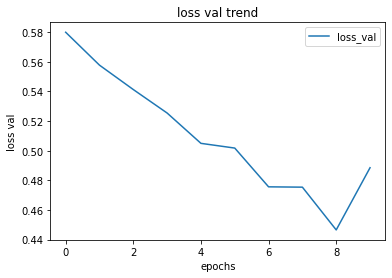

In [ ]:
obj1.loss_val_trend(epochs, loss_val_list)

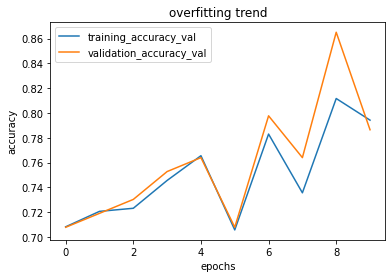

In [ ]:
obj1.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)